## Advanced Tutorial
### Follow along

Code for all the examples is located in your `PYTHONPATH/Lib/site-packages/eonr/examples` folder. With that said, you should be able to make use of `EONR` by following and executing the commands in this tutorial using either the sample data provided or substituting in your own data.

*You will find the following code included in the* `advanced_tutorial.py` *or* `advanced_tutorial.ipynb` *(for* [Jupyter notebooks](https://jupyter.org/)*) files in your* `PYTHONPATH/Lib/site-packages/eonr/examples` *folder - feel free to load that into your Python IDE to follow along.*

- - -
### Calculate `EONR` for several economic scenarios 
In this tutorial, we will run `EONR.calculate_eonr()` in a loop, adjusting the economic scenario prior to each run.

- - -
### Load modules
Load `pandas` and `EONR`:

In [1]:
import os
import pandas as pd
import eonr
print('EONR version: {0}'.format(eonr.__version__))

EONR version: 0.2.0


- - -
### Load the data
`EONR` uses Pandas dataframes to access and manipulate the experimental data.

In [2]:
df_data = pd.read_csv(os.path.join('data', 'minnesota_2012.csv'))
df_data

,year,location,plot,trt,rep,time_n,rate_n_applied_kgha,yld_grain_dry_kgha,nup_total_kgha,soil_plus_fert_n_kgha
0,2012,Minnesota,101,8,1,Pre,235.3785,12410.916200,198.759898,284.69590
1,2012,Minnesota,102,3,1,Pre,67.2510,10627.946000,147.971755,116.56840
2,2012,Minnesota,103,1,1,Pre,0.0000,7428.081218,98.769392,38.10890
3,2012,Minnesota,104,2,1,Pre,33.6255,9202.953180,111.440210,71.73440
4,2012,Minnesota,105,4,2,Pre,100.8765,10841.127180,142.663887,154.67730
5,2012,Minnesota,106,7,2,Pre,201.7530,10646.649330,178.802092,255.55380
6,2012,Minnesota,107,6,2,Pre,168.1275,12367.436000,186.053531,201.75300
7,2012,Minnesota,108,5,2,Pre,134.5020,13366.361700,196.737290,168.12750
8,2012,Minnesota,201,7,1,Pre,201.7530,14232.053480,228.775204,251.07040
9,2012,Minnesota,202,5,1,Pre,134.5020,14384.824980,226.006218,183.81940


- - -
### Set column names and units
*The table containing the experimental data* **must** *have a minimum of two columns:*

* Nitrogen fertilizer rate
* Grain yield

We'll also set *nitrogen uptake* and *available nitrogen* columns right away for calculating the socially optimum nitrogen rate.

As a reminder, we are declaring the names of these columns and units because they will be passed to `EONR` later.

In [3]:
col_n_app = 'rate_n_applied_kgha'
col_yld = 'yld_grain_dry_kgha'
col_crop_nup = 'nup_total_kgha'
col_n_avail = 'crop_n_available_kgha'

unit_currency = '$'
unit_fert = 'kg'
unit_grain = 'kg'
unit_area = 'ha'

def calc_mineralization(df_data, units_fert='kgha'):
    '''
    Calculates mineralization and adds "crop_available_n" to df
    '''
    df_trt0 = df_data[df_data['rate_n_applied_kgha']==0].copy()
    df_trt0['mineralize_n'] =  (df_trt0['nup_total_kgha'] -
                                df_trt0['soil_plus_fert_n_kgha'])
    trt0_mineralize = df_trt0['mineralize_n'].mean()
    crop_n_label = 'crop_n_available_' + units_fert
    df_data[crop_n_label] = df_data['soil_plus_fert_n_kgha'] + trt0_mineralize
    return df_data

df_data = calc_mineralization(df_data)

- - -
### Turn `base_zero` off
You might have noticed the `base_zero` option for the `EONR` class in the [API](my_eonr.html#module-eonr.eonr). `base_zero` is a `True`/`False` flag that determines if gross return to nitrogen should be expressed as an absolute values. We will see a bit later that upon executing `EONR.calculate_eonr()`, grain yield from the input dataset is used to create a new column for gross return to nitrogen *("grtn")* by multiplying the grain yield column by the price of grain (`price_grain` variable). 

If `base_zero` is `True` *(default)*, the observed yield return data are standardized so that the best-fit quadratic-plateau model passes through the y-axis at zero. This is done in two steps:

1. Fit the quadratic-plateau to the original data to determine the value of the y-intercept of the model ($\beta_0$)
2. Subtract $\beta_0$ from all data in the recently created *"grtn"* column (temporarily stored in `EONR.df_data`)

This behavior (`base_zero = True`) is the default in `EONR`. However, `base_zero` can simply be set to `False` during the initialization of `EONR`. We will set it store it in its own variable now, then pass to `EONR` during initialization:

In [4]:
base_zero = False

- - -
### Initialize `EONR`
Let's set the base directory and initialize an instance of `EONR`, setting `cost_n_fert = 0`, `costs_fixed = 0`, and `price_grain = 1.0` (\\$1.00 per kg) as the default values (we will adjust them later on in the tutorial):

In [5]:
import os
base_dir = os.path.join(os.getcwd(), 'eonr_advanced_tutorial')

my_eonr = eonr.EONR(cost_n_fert=0,
                    costs_fixed=0,
                    price_grain=1.0,
                    col_n_app=col_n_app,
                    col_yld=col_yld,
                    col_crop_nup=col_crop_nup,
                    col_n_avail=col_n_avail,
                    unit_currency=unit_currency,
                    unit_grain=unit_grain,
                    unit_fert=unit_fert,
                    unit_area=unit_area,
                    base_dir=base_dir,
                    base_zero=base_zero)

- - -
### Calculate the *AONR*
You may be wondering why `cost_n_fert` was set to 0. Well, setting our nitrogen fertilizer cost to \$0 essentially allows us to calculate the optimum nitrogen rate ignoring the cost of the fertilizer input. This is known as the *Agronomic Optimum Nitrogen Rate (AONR)*. The AONR provides insight into the maximum achievable grain yield. Notice `price_grain` was set to `1.0` - this effectively calculates the AONR so that the maximum return to nitrogen (MRTN), which will be expressed as \$ per ha when ploting via `EONR.plot_eonr()`, is similar to units of kg per ha (the units we are using for grain yield).

Let's calculate the AONR and plot it (adjusting `y_max` so it is greater than our maximum grain yield):


Computing AONR for Minnesota 2012 Pre
Cost of N fertilizer: $0.00 per kg
Price grain: $1.00 per kg
Fixed costs: $0.00 per ha
Agronomic optimum N rate (AONR): 177.4 kg per ha [139.9, 234.0] (90.0% confidence)
Maximum return to N (MRTN): $13579.23 per ha


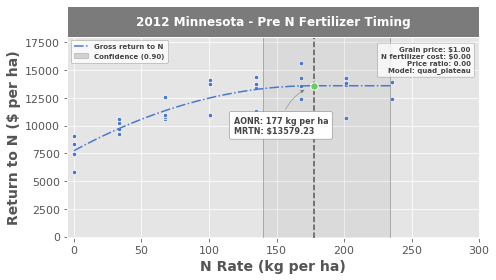

In [6]:
my_eonr.calculate_eonr(df_data)
my_eonr.plot_eonr(x_min=-5, x_max=300, y_min=-100, y_max=18000)

We see that the **agronomic** optimum nitrogen rate was calculated as **177** kg per ha, and the MRTN is **13.579 Mg per ha** (yes, it says $13,579, but because `price_grain` was set to \\$1, the values are equivalent and the units can be substituted.

If you've gone through the [first tutorial](tutorial.md), you'll notice there are a few major differences in the look of this plot:

**The red line representing nitrogen fertilizer cost is missing**

**The GRTN line does not pass through the y-intercept at** $\text{y}=0$**?**

*Because* `base_zero` *was set to* `False`*, the observed data (blue points) were not standardized as to "force" the best-fit model from passing through at* $\text{y}=0$.

- - -
### Bootstrap confidence intervals

We will calculate the AONR again, but this time we will compute the **bootstrap** confidence intervals in addition to the **profile-likelihood** and **Wald-type** confidence intervals. To tell `EONR` to compute the **bootstrap** confidence intervals, simply set `bootstrap_ci` to `True` in the `EONR.calcualte_eonr()` function:


Computing AONR for Minnesota 2012 Pre
Cost of N fertilizer: $0.00 per kg
Price grain: $1.00 per kg
Fixed costs: $0.00 per ha
Agronomic optimum N rate (AONR): 177.4 kg per ha [139.9, 234.0] (90.0% confidence)
Maximum return to N (MRTN): $13579.23 per ha


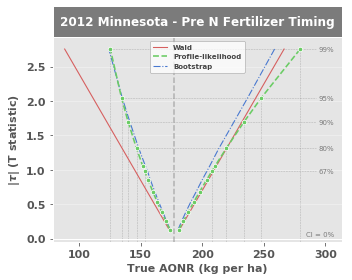

In [7]:
my_eonr.calculate_eonr(df_data, bootstrap_ci=True)
my_eonr.plot_tau()
my_eonr.fig_tau = my_eonr.plot_modify_size(fig=my_eonr.fig_tau.fig, plotsize_x=5, plotsize_y=4.0)

- - -
### Set fixed costs
Fixed costs (on a per area basis) can be considered by `EONR`. Simply set the fixed costs (using `EONR.update_econ()`) before calculating the EONR:

In [8]:
costs_fixed = 12.00  # set to $12 per hectare
my_eonr.update_econ(costs_fixed=costs_fixed)

- - -
### Loop through several economic conditions
`EONR` computes the optimum nitrogen rate for any economic scenario that we define. The `EONR` class is designed so the economic conditions can be adjusted, calculating the optimum nitrogen rate after each adjustment. We just have to set up a simple loop to update the economic scenario (using `EONR.update_econ()`) and calculate the EONR (using `EONR.calculate_eonr()`).

We will also generate plots and save them to our base directory right away:


Computing EONR for Minnesota 2012 Pre
Cost of N fertilizer: $0.44 per kg
Price grain: $0.16 per kg
Fixed costs: $12.00 per ha
Economic optimum N rate (EONR): 169.9 kg per ha [135.2, 220.9] (90.0% confidence)
Maximum return to N (MRTN): $2043.53 per ha

Computing EONR for Minnesota 2012 Pre
Cost of N fertilizer: $1.32 per kg
Price grain: $0.16 per kg
Fixed costs: $12.00 per ha
Economic optimum N rate (EONR): 154.8 kg per ha [125.7, 195.0] (90.0% confidence)
Maximum return to N (MRTN): $1900.67 per ha

Computing EONR for Minnesota 2012 Pre
Cost of N fertilizer: $2.20 per kg
Price grain: $0.16 per kg
Fixed costs: $12.00 per ha
Economic optimum N rate (EONR): 139.7 kg per ha [115.9, 170.1] (90.0% confidence)
Maximum return to N (MRTN): $1771.10 per ha


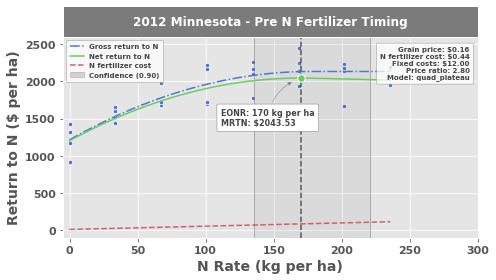

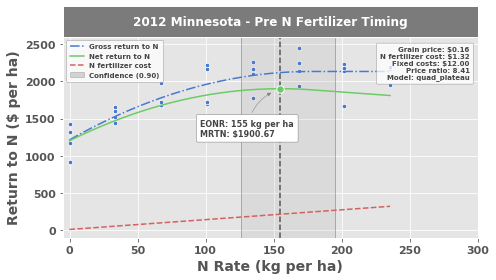

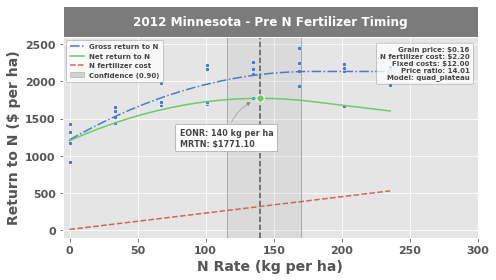

In [9]:
price_grain = 0.157  # set from $1 to 15.7 cents per kg
cost_n_fert_list = [0.44, 1.32, 2.20]

for cost_n_fert in cost_n_fert_list:
    # first, update fertilizer cost
    my_eonr.update_econ(cost_n_fert=cost_n_fert,
                        price_grain=price_grain)
    # second, calculate EONR
    my_eonr.calculate_eonr(df_data)
    # third, generate (and save) the plots
    my_eonr.plot_eonr(x_min=-5, x_max=300, y_min=-100, y_max=2600)
    my_eonr.plot_save(fname='eonr_mn2012_pre.png', fig=my_eonr.fig_eonr)   

A similar loop can be made adjusting the social cost of nitrogen. `my_eonr.base_zero` is set to `True` to compare the graphs:


Computing SONR for Minnesota 2012 Pre
Cost of N fertilizer: $0.88 per kg
Price grain: $0.16 per kg
Fixed costs: $12.00 per ha
Social cost of N: $0.44 per kg
Socially optimum N rate (SONR): 160.1 kg per ha [129.0, 204.0] (90.0% confidence)
Maximum return to N (MRTN): $749.35 per ha

Computing SONR for Minnesota 2012 Pre
Cost of N fertilizer: $0.88 per kg
Price grain: $0.16 per kg
Fixed costs: $12.00 per ha
Social cost of N: $1.32 per kg
Socially optimum N rate (SONR): 155.8 kg per ha [126.3, 196.7] (90.0% confidence)
Maximum return to N (MRTN): $737.04 per ha

Computing SONR for Minnesota 2012 Pre
Cost of N fertilizer: $0.88 per kg
Price grain: $0.16 per kg
Fixed costs: $12.00 per ha
Social cost of N: $2.20 per kg
Socially optimum N rate (SONR): 151.8 kg per ha [123.8, 189.9] (90.0% confidence)
Maximum return to N (MRTN): $725.79 per ha

Computing SONR for Minnesota 2012 Pre
Cost of N fertilizer: $0.88 per kg
Price grain: $0.16 per kg
Fixed costs: $12.00 per ha
Social cost of N: $4.40 

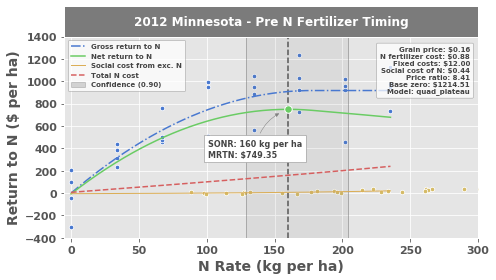

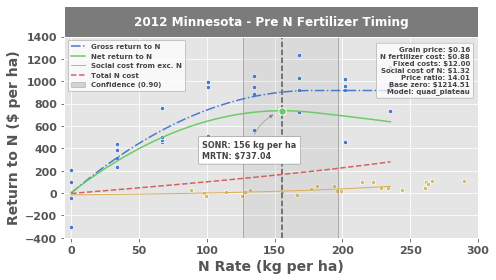

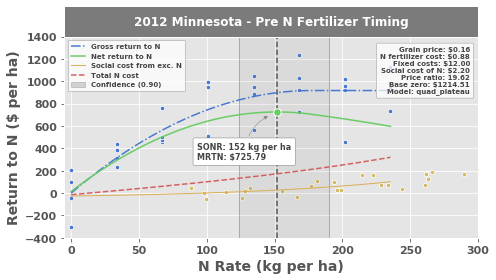

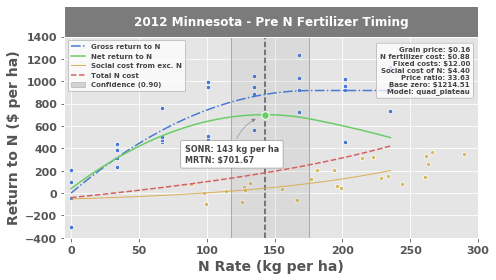

In [10]:
price_grain = 0.157  # keep at 15.7 cents per kg
cost_n_fert = 0.88  # set to be constant
my_eonr.update_econ(price_grain=price_grain,
                    cost_n_fert=cost_n_fert)
my_eonr.base_zero = True  # let's use base zero to compare graphs

cost_n_social_list = [0.44, 1.32, 2.20, 4.40]

for cost_n_social in cost_n_social_list:
    # first, update social cost
    my_eonr.update_econ(cost_n_social=cost_n_social)
    # second, calculate EONR
    my_eonr.calculate_eonr(df_data)
    # third, generate (and save) the plots
    my_eonr.plot_eonr(x_min=-5, x_max=300, y_min=-400, y_max=1400)
    my_eonr.plot_save(fname='eonr_mn2012_pre.png', fig=my_eonr.fig_eonr)

Notice that we used the same `EONR` instance (`my_eonr`) for all runs. This is convenient if there are many combinations of economic scenarios (or many experimental datasets) that you'd like to loop through. If you'd like the results to be saved separate (perhaps to separate results depending if a social cost is considered) that's fine too. Simply create a new instance of `EONR` and customize how you'd like.

- - -
### View results
All eight runs can be viewed in the dataframe:

In [11]:
my_eonr.df_results

,price_grain,cost_n_fert,cost_n_social,costs_fixed,price_ratio,unit_price_grain,unit_cost_n,location,year,time_n,...,mrtn,grtn_r2_adj,grtn_rmse,grtn_max_y,grtn_crit_x,grtn_y_int,scn_lin_r2,scn_lin_rmse,scn_exp_r2,scn_exp_rmse
0,1.000,0,0.00,0,0.000000,$ per ha,$ per kg,Minnesota,2012,Pre,...,13579.232456,0.728926,1154.305686,13579.232456,177.437339,7735.725352,None,None,None,None
1,1.000,0,0.00,0,0.000000,$ per ha,$ per kg,Minnesota,2012,Pre,...,13579.232456,0.728926,1154.305686,13579.232456,177.437339,7735.725352,None,None,None,None
2,0.157,0.44,0.00,12,2.802548,$ per ha,$ per kg,Minnesota,2012,Pre,...,2043.528038,0.728926,181.225993,2131.939496,177.437340,1214.508882,None,None,None,None
3,0.157,1.32,0.00,12,8.407643,$ per ha,$ per kg,Minnesota,2012,Pre,...,1900.670950,0.728926,181.225993,2131.939496,177.437340,1214.508882,None,None,None,None
4,0.157,2.2,0.00,12,14.012739,$ per ha,$ per kg,Minnesota,2012,Pre,...,1771.101634,0.728926,181.225993,2131.939496,177.437340,1214.508882,None,None,None,None
5,0.157,0.88,0.44,12,8.407643,$ per ha,$ per kg,Minnesota,2012,Pre,...,749.347111,0.728926,181.225993,917.433580,177.439985,0.002964,0.777106,55.7255,0.836099,8.44737
6,0.157,0.88,1.32,12,14.012739,$ per ha,$ per kg,Minnesota,2012,Pre,...,737.042610,0.728926,181.225993,917.433580,177.439985,0.002964,0.777106,167.176,0.836099,25.3421
7,0.157,0.88,2.20,12,19.617834,$ per ha,$ per kg,Minnesota,2012,Pre,...,725.792236,0.728926,181.225993,917.433580,177.439985,0.002964,0.777106,278.627,0.836099,42.2368
8,0.157,0.88,4.40,12,33.630573,$ per ha,$ per kg,Minnesota,2012,Pre,...,701.669696,0.728926,181.225993,917.433580,177.439985,0.002964,0.777106,557.255,0.836099,84.4737


`EONR.df_results` contains the following data columns (some columns are hidden by Jupyter in the table above):

* **price_grain** -- price of grain
* **cost_n_fert** -- cost of nitrogen fertilizer 
* **cost_n_social** -- other "social" costs of nitrogen
* **price_ratio** -- *cost:grain* price ratio
* **unit_price_grain** -- units descirbing the price of grain
* **unit_cost_n** -- units describing cost of nitrogen (both fertilizer and social costs)
* **location** -- location of dataset
* **year** -- year of dataset
* **time_n** -- nitrogen application timing of dataset
* **model** -- the model used to fit the experimental data (e.g., "quadratic" or "quad_plateau").
* **base_zero** -- if `base_zero = True`, this is the y-intercept ($\beta_0$) of the quadratic-plateau model before standardizing the data
* **eonr** -- optimum nitrogen rate (can be *agronomic*, *economic*, or *socially* optimum; in units of `EONR.unit_nrate`)
* **eonr_bias** -- bias in reparameterized quadratic-plateau model for computation of confidence intervals 
* **R*** -- the coefficient representing the generalized cost function
* **costs_at_onr** -- total costs at the optimum nitrogen rate
* **ci_level** -- confidence interval (CI) level (for subsequent confidence bounds)
* **ci_wald_l** -- lower Wald CI
* **ci_wald_u** -- upper Wald CI
* **ci_pl_l** -- lower profile-likelihood CI 
* **ci_pl_u** -- upper profile-likelihood CI
* **ci_boot_l** -- lower bootstrap CI
* **ci_boot_u** -- upper bootstrap CI 
* **mrtn** -- maximum return to nitrogen (in units of `EONR.unit_currency`)
* **grtn_r2_adj** -- adjusted $\text{r}^2$ value of the gross return to nitrogen (GRTN) model
* **grtn_rmse** -- root mean squared error of the GRTN
* **grtn_max_y** -- maximum y value of the GRTN (in units of `EONR.unit_rtn`)
* **grtn_crit_x** -- critical x-value of the GRTN (point where the "quadratic" part of the quadratic-plateau model terminates and the "plateau" commences)
* **grtn_y_int** -- y-intercept ($\beta_0$) of the GRTN model
* **scn_lin_r2** -- adjusted $\text{r}^2$ value of the linear best-fit for social cost of nitrogen
* **scn_lin_rmse** -- root mean squared error of the the linear best-fit for social cost of nitrogen
* **scn_exp_r2** -- adjusted $\text{r}^2$ value value of the exponential best-fit for social cost of nitrogen
* **scn_exp_rmse** -- root mean squared error of the the exponential best-fit for social cost of nitrogen

- - -
### Save the data
The results generated by `EONR` can be saved to the `EONR.base_dir` using the Pandas `df.to_csv()` function. A folder will be created in the base_dir whose name is determined by the **current economic scenario** of `my_eonr` (in this case "social_336_4400", corresponding to `cost_n_social > 0`, `price_ratio == 33.6`, and `cost_n_social == 4.40` for "social", "336", and "4400" in the folder name, respectively):

In [12]:
print(my_eonr.base_dir)

my_eonr.df_results.to_csv(os.path.join(os.path.split(my_eonr.base_dir)[0], 'advanced_tutorial_results.csv'), index=False)
my_eonr.df_ci.to_csv(os.path.join(os.path.split(my_eonr.base_dir)[0], 'advanced_tutorial_ci.csv'), index=False)

F:\nigo0024\Documents\GitHub\eonr\eonr\examples\eonr_advanced_tutorial\social_336_4400
